In [93]:
import sys
sys.path.append('../src')
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ODE_solver import ode_sistema


def potencial(y):
    return 0.5*(1 + np.exp(-2*y))**(-2)

def potencial_aproximado(y):
    return 0.5*(1 -2*np.exp(-2*y))

    
# Analytical solution  for field velocity in the large field limit

def analytical_velocity(y, v0):
    return -3*np.exp(-2*y)/np.sqrt(6) + v0
def analytical_velocity2(y, v0):
    return (+np.exp(-2*y)- np.exp(-y))/np.sqrt(6) 

In [94]:
y0, v0 = 5, 0
t_span = (0,26000)
sol = solve_ivp(ode_sistema, t_span, [y0, v0], method='RK45', dense_output=True)  # Solución numérica

t = np.linspace(0,t_span[1], 50000)

y, vel = sol.sol(t)[0], sol.sol(t)[1]  # Guardamos la solución numérica para el campo y su derivada.

potencial = 0.5*(1 + np.exp(-2*y))**(-2)  
damping = 3*vel*np.sqrt( potencial  + vel**2)
forcing = np.exp(-2*y) * (1 + np.exp(-2*y))**(-3)
acc = -damping - forcing # Obtenemos la solución numérica para la segunda derivada del campo.

Text(0.5, 1.0, 'Numerical and Analytical solutions for: $y^\\prime(\\tilde{t})$')

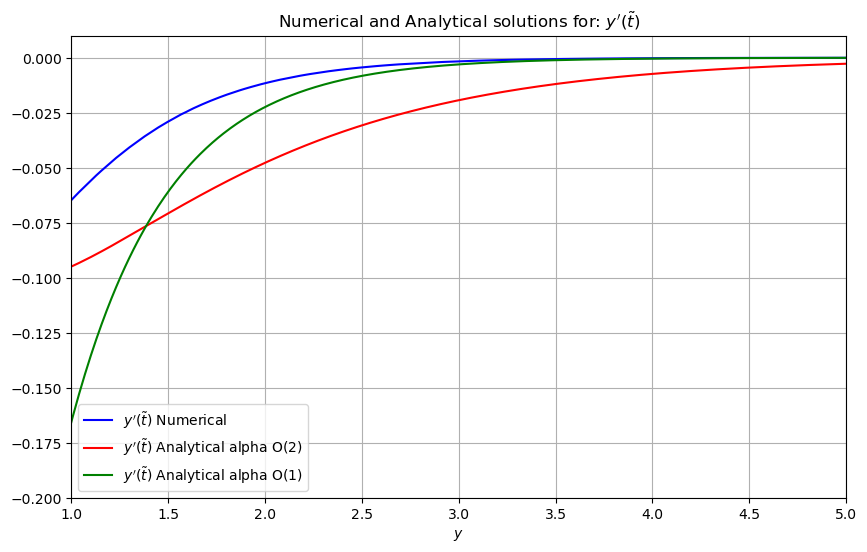

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(y,vel, 'b-', label=r"$y^\prime(\tilde{t})$ Numerical")
plt.plot(y,analytical_velocity2(y,v0), 'r-', label=r"$y^\prime(\tilde{t})$ Analytical alpha O(2)")
plt.plot(y,analytical_velocity(y,v0), 'g-', label=r"$y^\prime(\tilde{t})$ Analytical alpha O(1)")
plt.legend()
plt.xlim(1,5)
plt.ylim(-0.2, 0.01)
plt.xlabel(r"$y$")
plt.grid(True)
plt.title(r'Numerical and Analytical solutions for: $y^\prime(\tilde{t})$')